In [5]:
'''pip install pytesseract'''

### **1.Data preprocessing**

In [8]:
# libraries and reading data
import pandas as pd
import numpy as np
import pytesseract
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
dc_etf = pd.read_csv(r'C:\Users\HAI\Desktop\PI_cap\DC_ETF_test 1.csv')
dc_etf['date']=pd.to_datetime(dc_etf['date'])
VN30 = pd.read_csv(r'C:\Users\HAI\Desktop\PI_cap\VN30.csv')

In [14]:
# Read 30 datasets in Cau3 folder and concatenate into one dataframe
'''import os
directory_path = r'C:\Users\HAI\Desktop\PI_cap\Cau3'

# List to store DataFrames
dataframes = []

# Loop through all files in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith(".csv"):  # Assuming the files are CSVs
        file_path = os.path.join(directory_path, file_name)
        df = pd.read_csv(file_path)  # Read the file into a DataFrame
        dataframes.append(df)       # Add the DataFrame to the list

# Concatenate all DataFrames into one
concatenated_df = pd.concat(dataframes, ignore_index=True)

# Save the combined data to a new file
output_path = r"C:\Users\HAI\Desktop\PI_cap\VN30.csv"
concatenated_df.to_csv(output_path, index=False)

print(f"All files have been concatenated and saved to {output_path}")'''

All files have been concatenated and saved to C:\Users\HAI\Desktop\PI_cap\VN30.csv


In [19]:
VN30['Date'] = pd.to_datetime(VN30['Date'])
VN30.rename(columns={'Date':'date', 'Symbol':'stock'}, inplace=True)

In [3]:
#merge 2 dataframe on date and symbol
merge_df = pd.merge(dc_etf, VN30 , on=['date', 'stock'], how='outer')
merge_df

,date,stock,volume,weight,Open,High,Low,Close,Volume
0,2022-10-03,ACB,5000.0,5.69,22050.00000,22300.000000,21300.000000,21600.000000,3657900.0
1,2022-10-03,BID,400.0,0.69,33100.00000,33600.000000,31550.000000,31550.000000,1573400.0
2,2022-10-03,BVH,100.0,0.27,50175.63963,50644.570841,46705.548665,46705.548665,1381100.0
3,2022-10-03,CTG,1200.0,1.43,22700.00000,23000.000000,21600.000000,21600.000000,5690400.0
4,2022-10-03,FPT,1600.0,6.60,79600.00000,80300.000000,76400.000000,77000.000000,1245600.0
...,...,...,...,...,...,...,...,...,...
1945,2022-12-30,VIC,1700.0,5.30,53800.00000,53900.000000,53000.000000,53800.000000,2461700.0
1946,2022-12-30,VJC,500.0,3.18,112900.00000,112900.000000,108500.000000,109500.000000,132900.0
1947,2022-12-30,VNM,1500.0,6.72,78000.00000,78000.000000,76100.000000,76100.000000,1199300.0
1948,2022-12-30,VPB,7700.0,7.98,17900.00000,18100.000000,17600.000000,17900.000000,10035400.0


### **2. QUESTION 3B**

#### Baseline model

In [4]:
# Estimated VN30 index by DC ETF portfolio baseline
merge_df['weighted_contribution']=merge_df['weight']*merge_df['Close']/100
# Group by date and sum the contributions to estimate the VN30 Index value
vn30_index = merge_df.groupby('date')['weighted_contribution'].sum().reset_index()
vn30_index.rename(columns={'weighted_contribution': 'vn30_index_value'}, inplace=True)
vn30_index

,date,vn30_index_value
0,2022-10-03,47517.027004
1,2022-10-04,47901.096028
2,2022-10-05,48924.090306
3,2022-10-06,47579.557544
4,2022-10-07,46416.078415
...,...,...
60,2022-12-26,43734.729711
61,2022-12-27,44747.970188
62,2022-12-28,44723.197031
63,2022-12-29,44641.681132


In [6]:
vn30_index.to_csv(r'C:\Users\HAI\Desktop\PI_cap\vn30_index_baseline.csv', index=False)

<Axes: title={'center': 'Estimated VN30 Index by DC ETF Portfolio'}, xlabel='Date', ylabel='VN30 Index Value'>

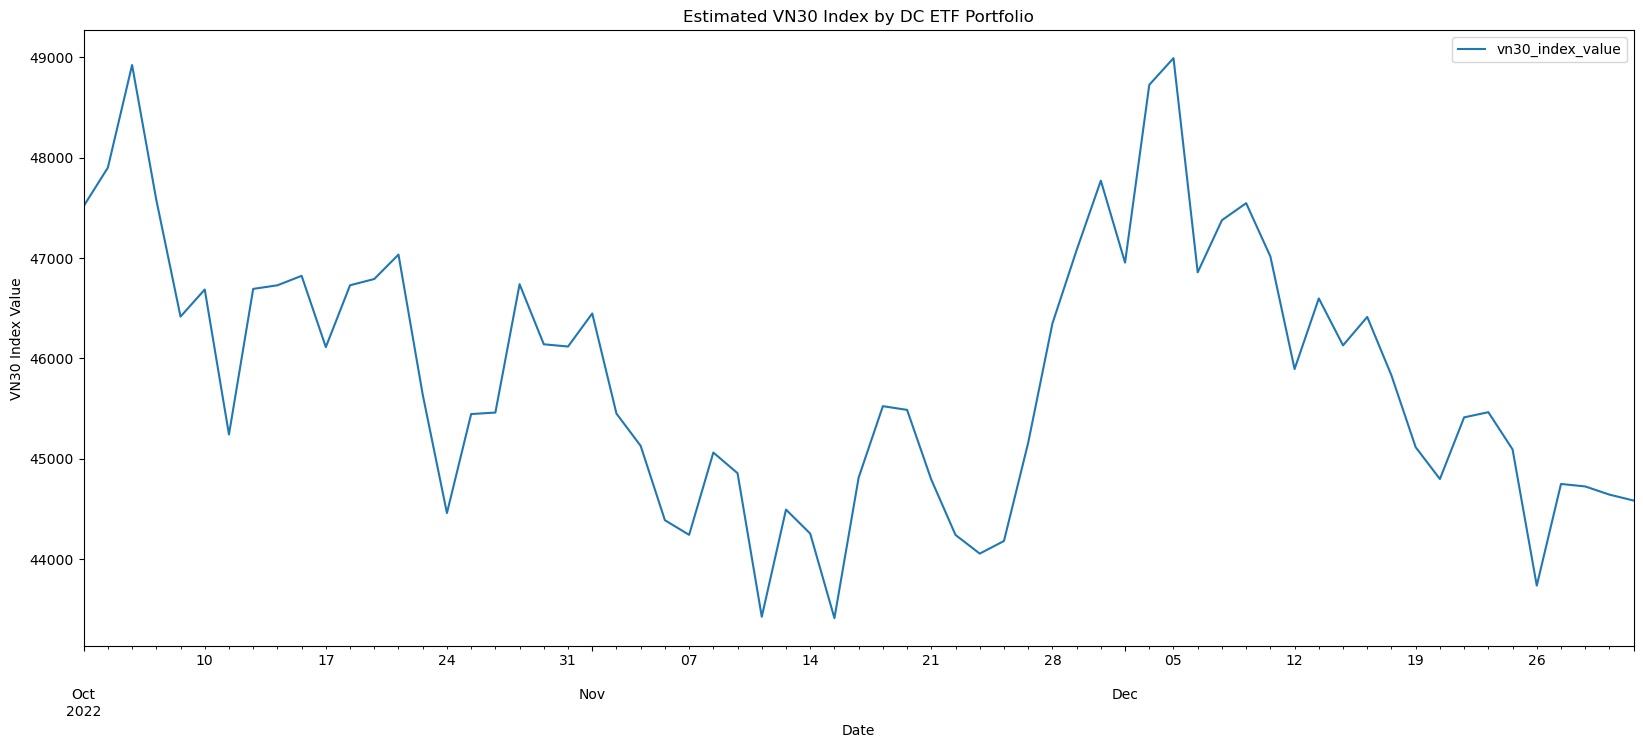

In [5]:
# Plotting the estimated results
vn30_index.plot(x='date', y='vn30_index_value', title='Estimated VN30 Index by DC ETF Portfolio', ylabel='VN30 Index Value', xlabel='Date', figsize=(20, 8))

#### EDA

In [54]:
# Plotly chart of 30 stocks close price
fig = px.line(merge_df, x='date', y='Close', color='stock', title='Close Price of 30 Stocks in VN30 Index')
fig.show()


c:\Users\HAI\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\HAI\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [38]:
# VOlume chart
fig = px.line(merge_df, x='date', y='Volume', color='stock', title='Trading volume of 30 Stocks in VN30 Index')
fig.show()

c:\Users\HAI\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\HAI\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



c:\Users\HAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\HAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\HAI\anaconda3\Lib\site-packages\sea

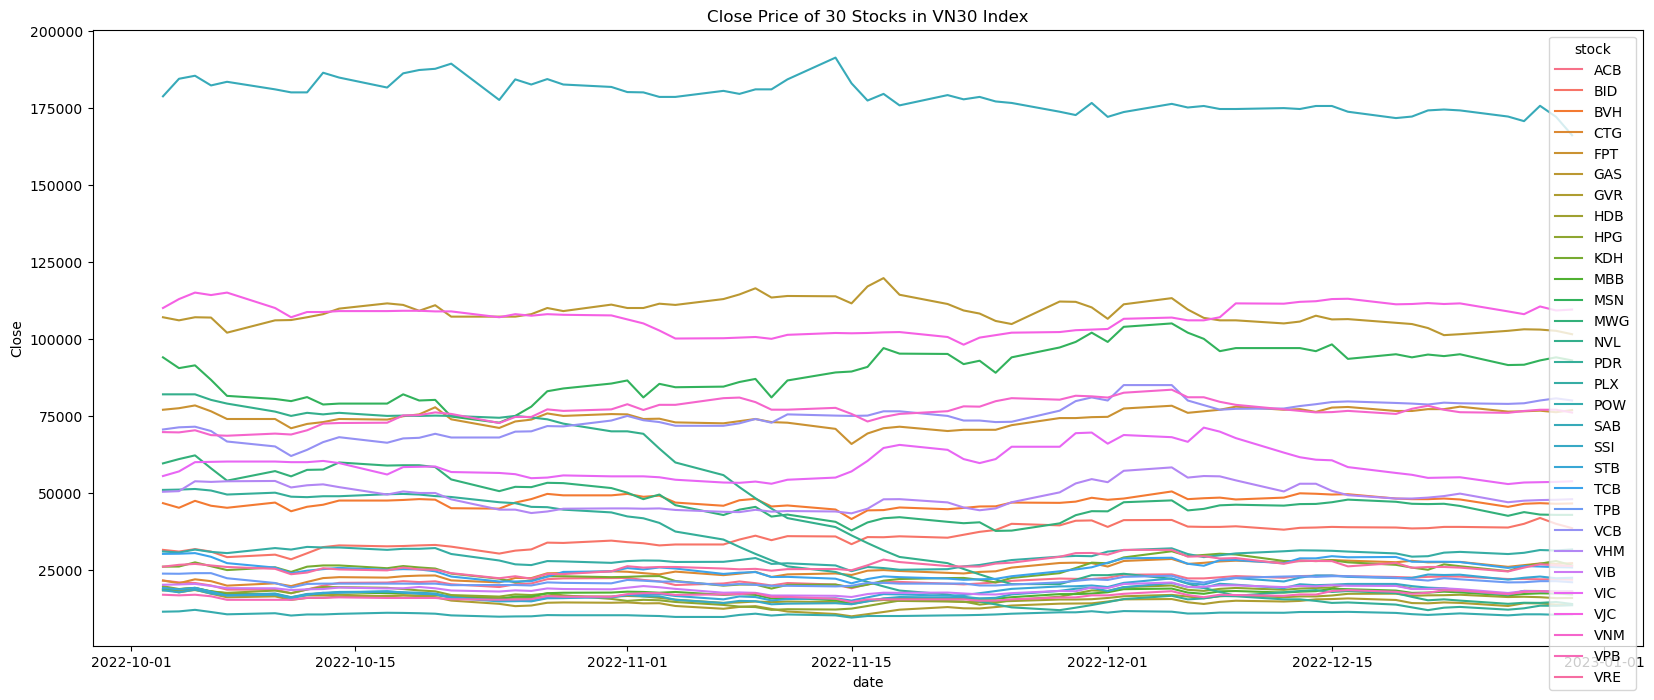

In [14]:
# Seaborn chart of 30 stocks close price
plt.figure(figsize=(20, 8))
sns.lineplot(data=merge_df, x='date', y='Close', hue='stock')
plt.title('Close Price of 30 Stocks in VN30 Index')
plt.show()


c:\Users\HAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\HAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\HAI\anaconda3\Lib\site-packages\sea

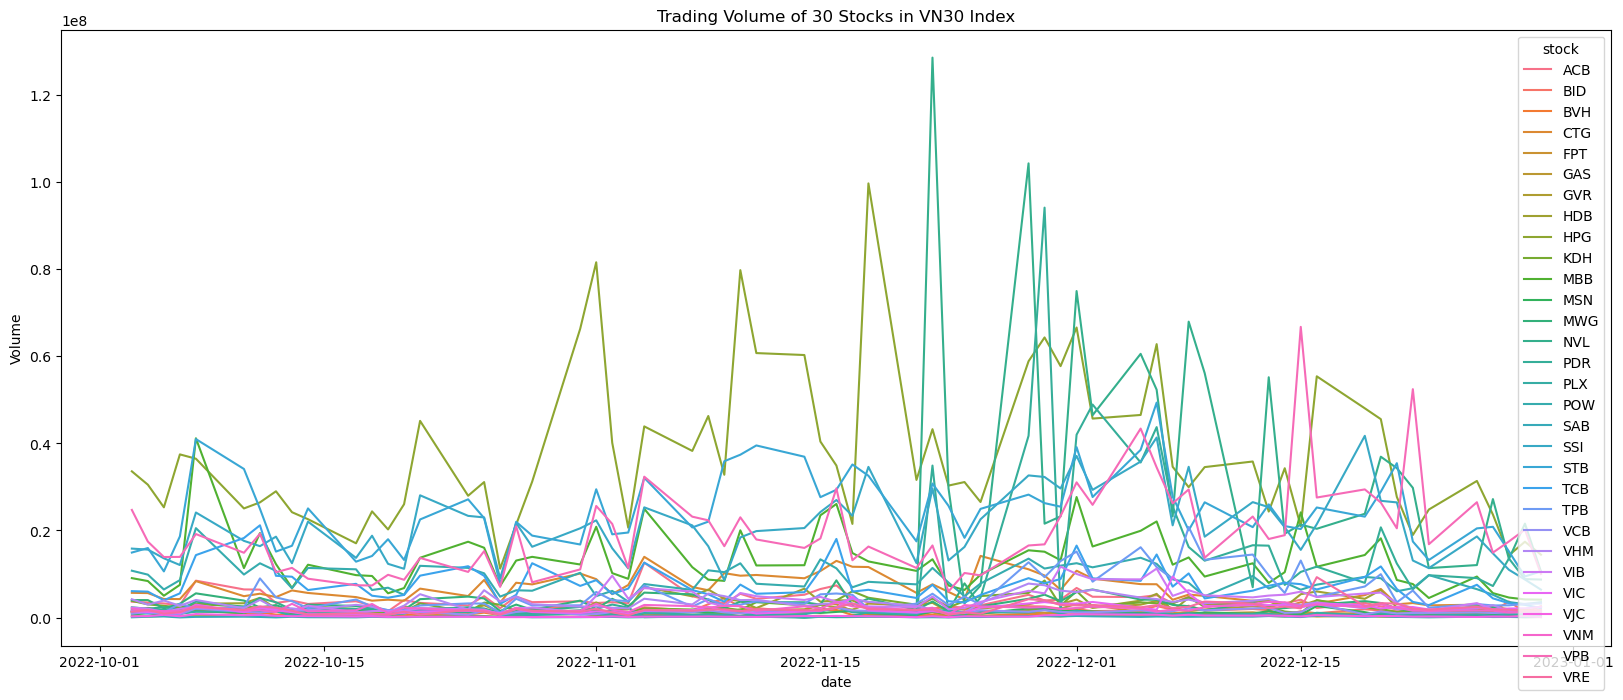

In [37]:
# Seaborn chart of 30 stocks trading volume
plt.figure(figsize=(20, 8))
sns.lineplot(data=merge_df, x='date', y='Volume', hue='stock') 
plt.title('Trading Volume of 30 Stocks in VN30 Index')
plt.show()


In [9]:
# Reading Fubon ETF data
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
def ocr_image(image_path):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img)
    return text

# Example usage
ocr_result = ocr_image(r"C:\Users\HAI\Desktop\PI_cap\Funbon.png")
ocr_result_1 = ocr_image(r"C:\Users\HAI\Desktop\PI_cap\Fubon_1.png")

In [10]:
ocr_result_1

'SBSSRSRPSRSXSSSVFSAP SERFS eC oN on enon\n\nWC\n\n10,0%\n10,0%\n10,0%\n10,0%\n10,0%\n64%\n5.8%\n43%\n3,6%\n2.5%\n2.5%\n24%\n2.2%\n2,0%\n1,8%\n1,8%\n1,6%\n1,6%\n1,5%\n1,3%\n1,2%\n11%\n1,0%\n1,0%\n0.8%\n0.8%\n07%\n07%\n0,6%\n0.6%\n'

In [11]:
# Convert OCR text to a DataFrame
def text_to_table(ocr_text):
    rows = ocr_text.strip().split("\n")
    table = [row.split() for row in rows]
    df = pd.DataFrame(table)
    return df

# Example usage
df = text_to_table(ocr_result)
df_1 = text_to_table(ocr_result_1)

In [12]:
#Cleaning first fubon data
weight_df = df[0][1:]
weight_df = weight_df.dropna()
weight_df = weight_df[:30]
# Dropping % sign from the end of the values
weight_df = weight_df.str.replace("%", "")
weight_df = weight_df.astype(float)
weight_df = weight_df.reset_index(drop=True)
# Fixing miss read values
def divide_by_10(df,x):
    df[x] = df[x]/10
    pass
for i in (6, 11, 12, 26, 25):
    divide_by_10(weight_df,i)
weight_df

0     10.0
1     10.0
2     10.0
3      8.7
4      7.5
5      8.5
6      4.7
7      4.6
8      3.7
9      3.0
10     2.8
11     2.7
12     2.1
13     2.1
14     1.9
15     1.9
16     1.7
17     1.7
18     1.5
19     1.5
20     1.5
21     1.2
22     0.6
23     1.0
24     0.8
25     0.7
26     0.7
27     0.5
28     2.1
29     0.5
Name: 0, dtype: float64

In [13]:
#Cleaning second fubon data
weight_df_1 = df_1[0][4:]
# Dropping % sign from the end of the values
weight_df_1 = weight_df_1.str.replace("%", "")
weight_df_1 = weight_df_1.str.replace(",", ".")
weight_df_1 = weight_df_1.astype(float)
weight_df_1 = weight_df_1.reset_index(drop=True)
# Fixing miss read values
for i in (5, 7, 11, 21, 26, 27):
    divide_by_10(weight_df_1,i)
weight_df_1

0     10.0
1     10.0
2     10.0
3     10.0
4     10.0
5      6.4
6      5.8
7      4.3
8      3.6
9      2.5
10     2.5
11     2.4
12     2.2
13     2.0
14     1.8
15     1.8
16     1.6
17     1.6
18     1.5
19     1.3
20     1.2
21     1.1
22     1.0
23     1.0
24     0.8
25     0.8
26     0.7
27     0.7
28     0.6
29     0.6
Name: 0, dtype: float64

In [14]:
# Adding symbol for weight_df
symbol = ['VHM', 'VIC', 'MSN', 'NVL', 'HPG', 'VNM', 'VRE', 'VCB', 'SSI', 'VJC', 'DGC', 'PDR', 'SAB', 'STB', 'VND', 'KDH', 'KBC', 'VCI', 'GEX', 'DIG', 'DPM', 'PLX', 'SHB', 'POW', 'SBT', 'VCG', 'BVH', 'HCM', 'VGC', 'SSB']
fubon_etf = pd.DataFrame({'stock': symbol, 'weight': weight_df})
fubon_etf

,stock,weight
0,VHM,10.0
1,VIC,10.0
2,MSN,10.0
3,NVL,8.7
4,HPG,7.5
5,VNM,8.5
6,VRE,4.7
7,VCB,4.6
8,SSI,3.7
9,VJC,3.0


In [15]:
#Adding symbol for weight_df_1
symbol_1 = ['VIC', 'VHM',  'MSN','VNM','HPG','VRE','VCB','SSI','VJC','STB','SAB','DGC', 'NVL','KDH','VND','VGC','KBC','VCI','DPM','GEX','PLX','PDR','POW', 'DIG', 'HDB', 'SBT', 'BVH', 'VCG', 'SHB', 'HCM']
fubon_etf_1 = pd.DataFrame({'stock': symbol_1, 'weight': weight_df_1})
fubon_etf_1

,stock,weight
0,VIC,10.0
1,VHM,10.0
2,MSN,10.0
3,VNM,10.0
4,HPG,10.0
5,VRE,6.4
6,VCB,5.8
7,SSI,4.3
8,VJC,3.6
9,STB,2.5


In [16]:
# Merge First Fubon ETF data with VN30 data from 2022-10-03 to 2022-16-12
fubon_etf['date'] = '2022-10-03'
fubon_etf['date'] = pd.to_datetime(fubon_etf['date'])

In [17]:
fubon_etf_1['date'] = '2022-12-16'
fubon_etf_1['date'] = pd.to_datetime(fubon_etf_1['date'])
fubon_etf_1

,stock,weight,date
0,VIC,10.0,2022-12-16
1,VHM,10.0,2022-12-16
2,MSN,10.0,2022-12-16
3,VNM,10.0,2022-12-16
4,HPG,10.0,2022-12-16
5,VRE,6.4,2022-12-16
6,VCB,5.8,2022-12-16
7,SSI,4.3,2022-12-16
8,VJC,3.6,2022-12-16
9,STB,2.5,2022-12-16


In [20]:
merge_df_fubon = pd.merge(fubon_etf, VN30 , on=['stock', 'date'], how='right')
# Forward fill nan weight at 2022-10-03 with 0
merge_df_fubon.loc[(merge_df_fubon['date'] == '2022-10-03') & (merge_df_fubon['weight'].isnull()), 'weight'] = 0
merge_df_fubon['weight']=merge_df_fubon['weight'].fillna(method='ffill')
# Drop zero weight values
merge_df_fubon = merge_df_fubon[merge_df_fubon['weight']!=0]
# Dropping day 2022-12-16 onward
merge_df_fubon = merge_df_fubon[merge_df_fubon['date']<'2022-12-16']
merge_df_fubon

C:\Users\HAI\AppData\Local\Temp\ipykernel_20296\2405012169.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merge_df_fubon['weight']=merge_df_fubon['weight'].fillna(method='ffill')


,stock,weight,date,Open,High,Low,Close,Volume
130,BVH,0.7,2022-10-03,50175.639630,50644.570841,46705.548665,46705.548665,1381100.0
131,BVH,0.7,2022-10-04,47924.769814,48112.342299,45204.968788,45204.968788,1683600.0
132,BVH,0.7,2022-10-05,46611.762422,48018.556057,46142.831211,47455.838603,978300.0
133,BVH,0.7,2022-10-06,47455.838603,47737.197330,45486.327515,45861.472484,1088000.0
134,BVH,0.7,2022-10-07,45580.113757,45673.899999,43704.388911,45204.968788,1482200.0
...,...,...,...,...,...,...,...,...
1934,VRE,4.7,2022-12-09,28850.000000,29500.000000,28050.000000,28900.000000,3690300.0
1935,VRE,4.7,2022-12-12,29200.000000,29950.000000,27050.000000,27050.000000,3231300.0
1936,VRE,4.7,2022-12-13,27400.000000,28000.000000,27050.000000,28000.000000,2178600.0
1937,VRE,4.7,2022-12-14,28050.000000,28100.000000,27200.000000,27950.000000,2533600.0


In [21]:
merge_df_fubon_1 = pd.merge(fubon_etf_1, VN30 , on=['stock', 'date'], how='right')
# Forward fill nan weight at 2022-10-03 with 0
merge_df_fubon_1.loc[(merge_df_fubon_1['date'] == '2022-12-16') & (merge_df_fubon_1['weight'].isnull()), 'weight'] = 0
merge_df_fubon_1['weight']=merge_df_fubon_1['weight'].fillna(method='ffill')
# Drop zero weight values
merge_df_fubon_1 = merge_df_fubon_1[merge_df_fubon_1['weight']!=0]

# Dropping day 2022-12-15 backward
merge_df_fubon_1 = merge_df_fubon_1[merge_df_fubon_1['date']>='2022-12-16']
merge_df_fubon_1

C:\Users\HAI\AppData\Local\Temp\ipykernel_20296\1790987958.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merge_df_fubon_1['weight']=merge_df_fubon_1['weight'].fillna(method='ffill')


,stock,weight,date,Open,High,Low,Close,Volume
184,BVH,0.7,2022-12-16,48600.0,49600.0,48600.0,49600.0,1031800.0
185,BVH,0.7,2022-12-19,49400.0,49400.0,48200.0,48200.0,642200.0
186,BVH,0.7,2022-12-20,48000.0,49100.0,46500.0,48000.0,1172700.0
187,BVH,0.7,2022-12-21,48000.0,48300.0,47500.0,48000.0,483600.0
188,BVH,0.7,2022-12-22,48200.0,48600.0,47550.0,48200.0,309100.0
...,...,...,...,...,...,...,...,...
1945,VRE,6.4,2022-12-26,26050.0,26050.0,24550.0,24550.0,2460400.0
1946,VRE,6.4,2022-12-27,25000.0,26250.0,24750.0,25800.0,1897200.0
1947,VRE,6.4,2022-12-28,25750.0,27100.0,25600.0,26900.0,1813400.0
1948,VRE,6.4,2022-12-29,26800.0,27150.0,26500.0,26500.0,1545900.0


#### FUBON data 

In [22]:
# Merge 2 dataframes 
df_fubon = pd.concat([merge_df_fubon, merge_df_fubon_1])
df_fubon.reset_index(drop=True, inplace=True)
df_fubon

,stock,weight,date,Open,High,Low,Close,Volume
0,BVH,0.7,2022-10-03,50175.639630,50644.570841,46705.548665,46705.548665,1381100.0
1,BVH,0.7,2022-10-04,47924.769814,48112.342299,45204.968788,45204.968788,1683600.0
2,BVH,0.7,2022-10-05,46611.762422,48018.556057,46142.831211,47455.838603,978300.0
3,BVH,0.7,2022-10-06,47455.838603,47737.197330,45486.327515,45861.472484,1088000.0
4,BVH,0.7,2022-10-07,45580.113757,45673.899999,43704.388911,45204.968788,1482200.0
...,...,...,...,...,...,...,...,...
1111,VRE,6.4,2022-12-26,26050.000000,26050.000000,24550.000000,24550.000000,2460400.0
1112,VRE,6.4,2022-12-27,25000.000000,26250.000000,24750.000000,25800.000000,1897200.0
1113,VRE,6.4,2022-12-28,25750.000000,27100.000000,25600.000000,26900.000000,1813400.0
1114,VRE,6.4,2022-12-29,26800.000000,27150.000000,26500.000000,26500.000000,1545900.0


In [18]:
'''df_fubon.drop_duplicates(subset=['date', 'stock'], keep='first', inplace=True)
df_fubon.reset_index(drop=True, inplace=True)
df_fubon'''

,stock,weight,date,Open,High,Low,Close,Volume
0,BVH,0.7,2022-10-03,50175.639630,50644.570841,46705.548665,46705.548665,1381100.0
1,BVH,0.7,2022-10-04,47924.769814,48112.342299,45204.968788,45204.968788,1683600.0
2,BVH,0.7,2022-10-05,46611.762422,48018.556057,46142.831211,47455.838603,978300.0
3,BVH,0.7,2022-10-06,47455.838603,47737.197330,45486.327515,45861.472484,1088000.0
4,BVH,0.7,2022-10-07,45580.113757,45673.899999,43704.388911,45204.968788,1482200.0
...,...,...,...,...,...,...,...,...
1111,VRE,6.4,2022-12-26,26050.000000,26050.000000,24550.000000,24550.000000,2460400.0
1112,VRE,6.4,2022-12-27,25000.000000,26250.000000,24750.000000,25800.000000,1897200.0
1113,VRE,6.4,2022-12-28,25750.000000,27100.000000,25600.000000,26900.000000,1813400.0
1114,VRE,6.4,2022-12-29,26800.000000,27150.000000,26500.000000,26500.000000,1545900.0


#### Estimated VN30 with holding volume and adjusted weight

In [23]:
fubon_stock_common_list = df_fubon['stock'].unique()
# Calculating the number of stocks in the fubon common list each day
merge_df['fubon_stock'] = merge_df['stock'].apply(lambda x: 1 if x in fubon_stock_common_list else 0)
merge_df['adjusted_divisor'] = merge_df['fubon_stock'].apply(lambda x: 1 if x==1 else 0.5)
merge_df


,date,stock,volume,weight,Open,High,Low,Close,Volume,weighted_contribution,fubon_stock,adjusted_divisor
0,2022-10-03,ACB,5000.0,5.69,22050.00000,22300.000000,21300.000000,21600.000000,3657900.0,1229.040000,0,0.5
1,2022-10-03,BID,400.0,0.69,33100.00000,33600.000000,31550.000000,31550.000000,1573400.0,217.695000,0,0.5
2,2022-10-03,BVH,100.0,0.27,50175.63963,50644.570841,46705.548665,46705.548665,1381100.0,126.104981,1,1.0
3,2022-10-03,CTG,1200.0,1.43,22700.00000,23000.000000,21600.000000,21600.000000,5690400.0,308.880000,0,0.5
4,2022-10-03,FPT,1600.0,6.60,79600.00000,80300.000000,76400.000000,77000.000000,1245600.0,5082.000000,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1945,2022-12-30,VIC,1700.0,5.30,53800.00000,53900.000000,53000.000000,53800.000000,2461700.0,2851.400000,1,1.0
1946,2022-12-30,VJC,500.0,3.18,112900.00000,112900.000000,108500.000000,109500.000000,132900.0,3482.100000,1,1.0
1947,2022-12-30,VNM,1500.0,6.72,78000.00000,78000.000000,76100.000000,76100.000000,1199300.0,5113.920000,1,1.0
1948,2022-12-30,VPB,7700.0,7.98,17900.00000,18100.000000,17600.000000,17900.000000,10035400.0,1428.420000,0,0.5


In [24]:
merge_df['daily_cap']= merge_df['Close']*merge_df['volume']*merge_df['adjusted_divisor']
merge_df['weighted_contribution']=merge_df['weight']*merge_df['daily_cap']/100
vn30_index_holdingvol = merge_df.groupby('date')['weighted_contribution'].sum().reset_index()
vn30_index_holdingvol.rename(columns={'weighted_contribution': 'vn30_index_value'}, inplace=True)
vn30_index_holdingvol['volume']=merge_df.groupby('date')['volume'].sum().reset_index()['volume']
vn30_index_holdingvol['value']=(vn30_index_holdingvol['vn30_index_value']/vn30_index_holdingvol['volume'])
vn30_index_holdingvol

,date,vn30_index_value,volume,value
0,2022-10-03,6.687745e+07,57300.0,1167.145719
1,2022-10-04,6.676953e+07,57300.0,1165.262324
2,2022-10-05,6.798820e+07,57300.0,1186.530548
3,2022-10-06,6.609250e+07,57300.0,1153.446783
4,2022-10-07,6.415273e+07,57300.0,1119.593863
...,...,...,...,...
60,2022-12-26,6.147945e+07,57300.0,1072.939714
61,2022-12-27,6.277659e+07,57300.0,1095.577499
62,2022-12-28,6.309466e+07,57300.0,1101.128403
63,2022-12-29,6.275857e+07,57300.0,1095.262957


In [26]:
vn30_index_holdingvol.to_csv(r'C:\Users\HAI\Desktop\PI_cap\vn30_index_holdingvol.csv', index=False)

In [25]:
import plotly.express as px
fig = px.line(vn30_index_holdingvol, x='date', y='value', title='Estimated VN30 Index by DC ETF Portfolio with holding volume and adjusted divisor')
fig.show()

c:\Users\HAI\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


<Axes: title={'center': 'Estimated VN30 Index by DC ETF Portfolio with holding volume and adjusted weight'}, xlabel='Date', ylabel='VN30 Index Value'>

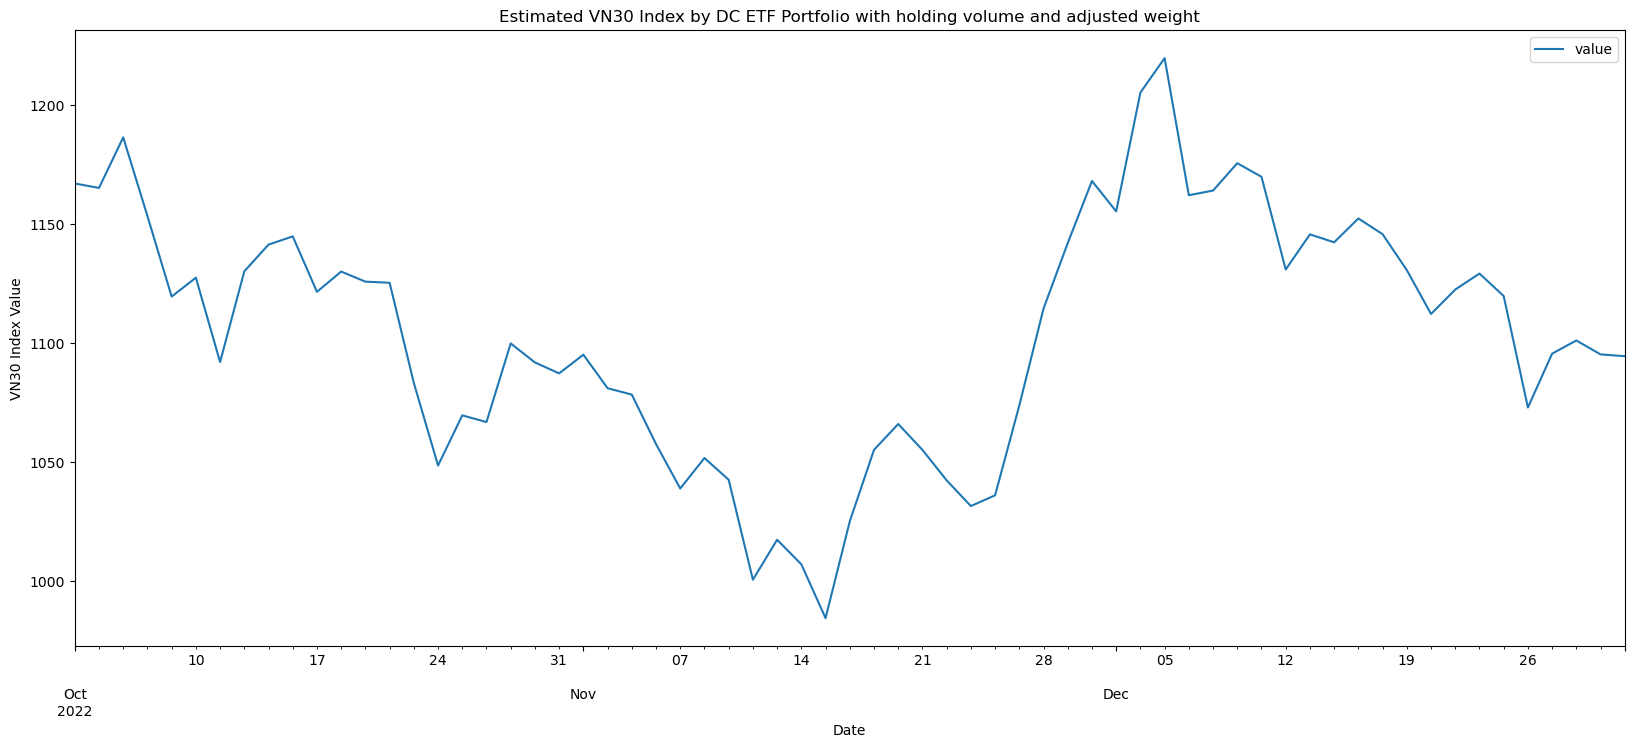

In [30]:
vn30_index_holdingvol.plot(x='date', y='value', title='Estimated VN30 Index by DC ETF Portfolio with holding volume and adjusted weight', ylabel='VN30 Index Value', xlabel='Date', figsize=(20, 8))

### **3. QUESTION 3C**

#### Volatility index computing with Parkinson proxy

In [27]:
merge_df['log_HL'] = np.log(merge_df['High'] / merge_df['Low']) ** 2
# Group by date and stock and calculate the rolling sum of log_HL
merge_df['volatility'] = np.sqrt((1 / (4 * 5 * np.log(2))) * merge_df.groupby('stock')['log_HL'].transform(lambda x: x.rolling(5).sum()))
merge_df = merge_df.dropna()
merge_df


,date,stock,volume,weight,Open,High,Low,Close,Volume,weighted_contribution,fubon_stock,adjusted_divisor,daily_cap,log_HL,volatility
120,2022-10-07,ACB,5000.0,5.46,19550.000000,19900.000000,18600.000000,18650.000000,8485400.0,2.545725e+06,0,0.5,4.662500e+07,0.004564,0.030586
121,2022-10-07,BID,400.0,0.68,30500.000000,30600.000000,28900.000000,29200.000000,1716300.0,3.971200e+04,0,0.5,5.840000e+06,0.003267,0.026812
122,2022-10-07,BVH,100.0,0.27,45580.113757,45673.899999,43704.388911,45204.968788,1482200.0,1.220534e+04,1,1.0,4.520497e+06,0.001943,0.034295
123,2022-10-07,CTG,1200.0,1.40,21300.000000,21300.000000,19950.000000,19950.000000,8381600.0,1.675800e+05,0,0.5,1.197000e+07,0.004287,0.040242
124,2022-10-07,FPT,1600.0,6.68,76200.000000,76200.000000,74000.000000,74000.000000,2061000.0,3.954560e+06,0,0.5,5.920000e+07,0.000858,0.019023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,2022-12-30,VIC,1700.0,5.30,53800.000000,53900.000000,53000.000000,53800.000000,2461700.0,4.847380e+06,1,1.0,9.146000e+07,0.000284,0.021649
1946,2022-12-30,VJC,500.0,3.18,112900.000000,112900.000000,108500.000000,109500.000000,132900.0,1.741050e+06,1,1.0,5.475000e+07,0.001580,0.024407
1947,2022-12-30,VNM,1500.0,6.72,78000.000000,78000.000000,76100.000000,76100.000000,1199300.0,7.670880e+06,1,1.0,1.141500e+08,0.000608,0.012994
1948,2022-12-30,VPB,7700.0,7.98,17900.000000,18100.000000,17600.000000,17900.000000,10035400.0,5.499417e+06,0,0.5,6.891500e+07,0.000785,0.030030


In [28]:
# The Volatility index of VN30
merge_df['weighted_volatility']=merge_df['weight']*merge_df['volatility']/100
vn30_volatility = merge_df.groupby('date')['weighted_volatility'].sum().reset_index()
vn30_volatility.rename(columns={'weighted_volatility': 'vn30_volatility_index'}, inplace=True)
vn30_volatility

C:\Users\HAI\AppData\Local\Temp\ipykernel_20296\2211283587.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,vn30_volatility_index
0,2022-10-07,0.029381
1,2022-10-10,0.030574
2,2022-10-11,0.032174
3,2022-10-12,0.034337
4,2022-10-13,0.033811
...,...,...
56,2022-12-26,0.025515
57,2022-12-27,0.024862
58,2022-12-28,0.023975
59,2022-12-29,0.023294


In [30]:
vn30_volatility.to_csv(r'C:\Users\HAI\Desktop\PI_cap\vn30_volatility_index.csv', index=False)

<Axes: title={'center': 'Estimated VN30 Volatility Index by DC ETF Portfolio'}, xlabel='Date', ylabel='VN30 Volatility Index Value'>

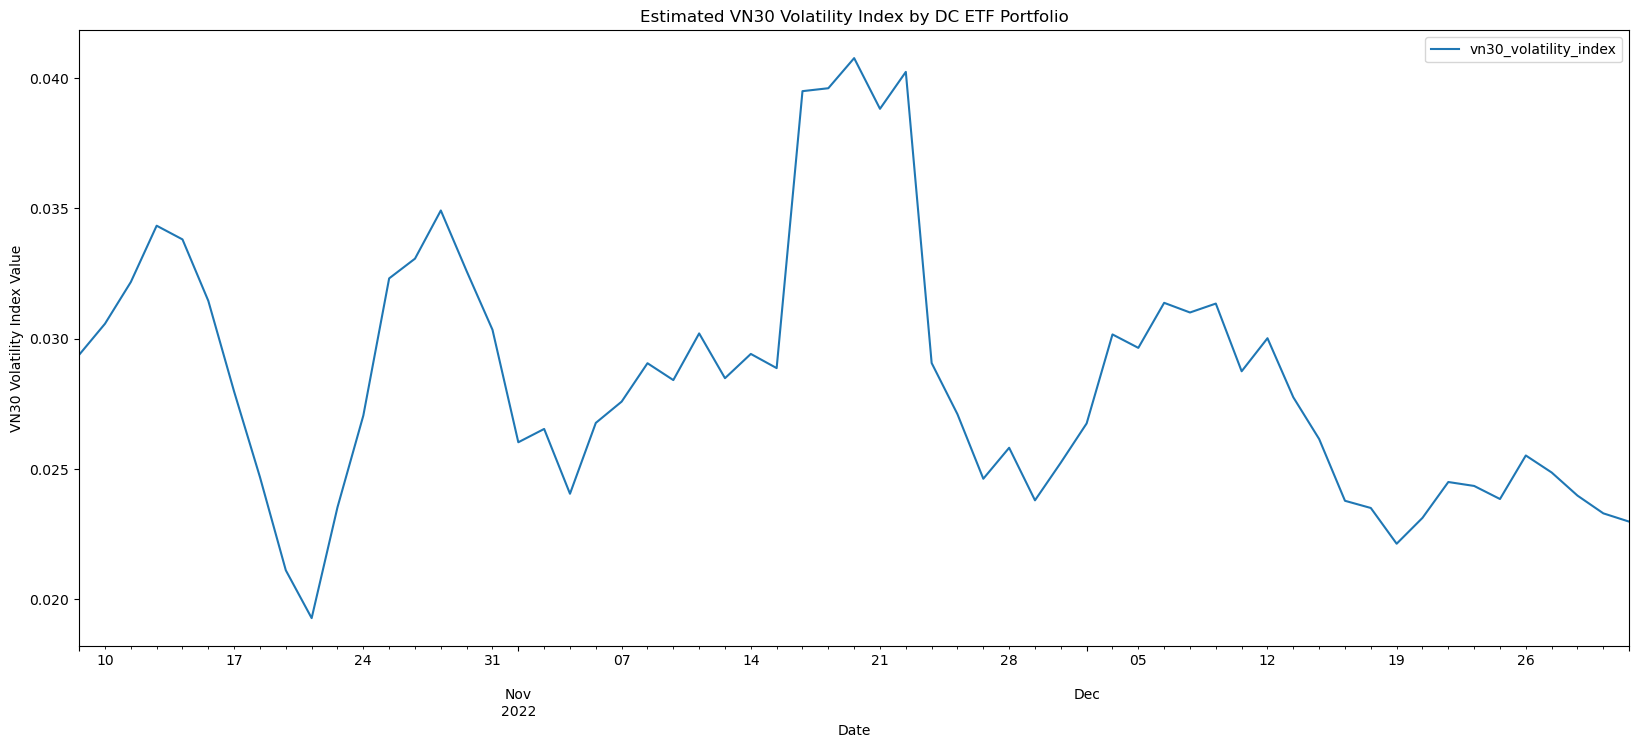

In [29]:
vn30_volatility.plot(x='date', y='vn30_volatility_index', title='Estimated VN30 Volatility Index by DC ETF Portfolio', ylabel='VN30 Volatility Index Value', xlabel='Date', figsize=(20, 8))

In [24]:
fig = px.line(vn30_volatility, x='date', y='vn30_volatility_index', title='Estimated VN30 Volatility Index by DC ETF Portfolio')
fig.show()

c:\Users\HAI\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

